In [66]:
# importing libraries and creating a dataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline
df=pd.read_csv("train.csv", encoding="ISO-8859-1")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Preprocessing phase.

In [67]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # create a new column FamilySize it will be use full for personnes on board
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [68]:
df = df.dropna(subset=['Embarked']) #deleting mission values in column Embarker 

In [69]:
#The argument subset indicates that the code will drop rows with NaN values in Embarked column only.

In [70]:
embarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_one_hot], axis=1)
df.head() #the one-hot-encoded values are stored in embarked_one_hot variable

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1


In [71]:
df['Cabin'] = df['Cabin'].fillna('U') #using fillna() method to clean culumn Cabin
df['Cabin'] = df['Cabin'].apply(lambda x: x[0]) # Extract charaters with lambda function like this

In [72]:
cabin_one_hot = pd.get_dummies(df['Cabin'], prefix='Cabin') # convert the value of this column into one-hot format
df = pd.concat([df, cabin_one_hot], axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_U'],
      dtype='object')

In [73]:
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()

In [74]:
df['Title'] = df['Name'].apply(get_title)

In [75]:
title_one_hot = pd.get_dummies(df['Title'], prefix='Title') # convert the values of Title into one-hot representation
df = pd.concat([df, title_one_hot], axis=1)

In [76]:
sex_one_hot = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df, sex_one_hot], axis=1)

In [77]:
age_median = df.groupby('Title')['Age'].median()
age_median   # group all passengers data by its Title first, and compute the median of each title group before eventually use these medians to fill the missing values

Title
Capt            70.0
Col             58.0
Don             40.0
Dr              46.5
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           3.5
Miss            21.0
Mlle            24.0
Mme             24.0
Mr              30.0
Mrs             35.0
Ms              28.0
Rev             46.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

In [78]:
def fill_age(x):
    for index, age in zip(age_median.index, age_median.values): 
        if x['Title'] == index:
            return age


In [79]:
df['Age'] = df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)

In [80]:
df = df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title'], axis=1) #drop all the columns that contain categorical data using 

In [81]:
df = (df-df.min())/(df.max()-df.min()) #normalize all values

### Machine learning: logistic regression

In [82]:
y = df['Survived'].values
X = df.iloc[:,1:].values

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2)  # spliting train data set 

In [84]:
df = LogisticRegression()
df.fit(X_train, y_train)#initialize a LogisticRegression()  
print(df.score(X_train, y_train))
print(df.score(X_test, y_test))

0.8410689170182841
0.848314606741573


### Use a confusion matrix to validate your model. 

In [85]:
train_preds = df.predict(X_train)
cm = confusion_matrix(y_train, train_preds)

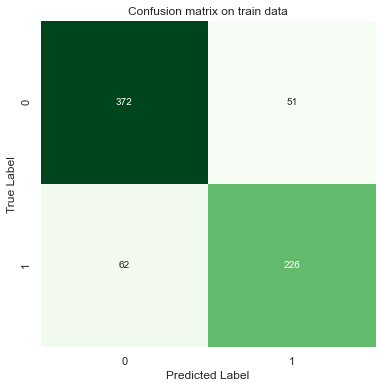

In [86]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on train data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [87]:
test_preds = df.predict(X_test)
cm = confusion_matrix(y_test, test_preds)

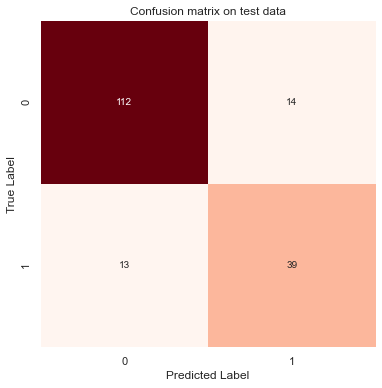

In [88]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on test data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Reds, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Apply Another validation matrix for classification is ROC / AUC

In [89]:
# predict probabilities
pred_prob1 = df.predict_proba(X_test)
pred_prob2 = df.predict_proba(X_test)

In [96]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [97]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.873550061050061 0.873550061050061


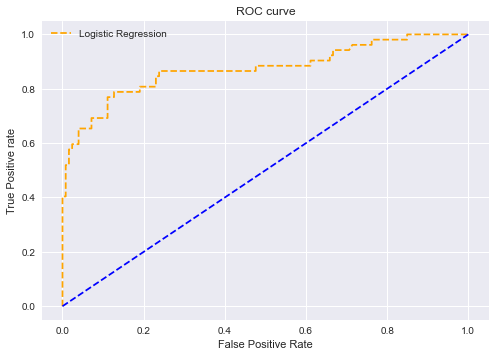

In [99]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# AUC-ROC Validation Matrix
The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR (True Positif Rate)against FPR (False Positif Rate) at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.